<a href="https://colab.research.google.com/github/MrCalmTam/TRAIN_ANN_CNN/blob/main/5Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.models import Sequential, Model
from keras import Input
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from numpy import asarray

folder = '/content/drive/MyDrive/Colab Notebooks/FLOWERS/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('waterlily'):
    output = 0
  if file.startswith('Rose'):
    output = 1
  if file.startswith('lotus'):
    output = 2
  if file.startswith('daisy'):
    output = 3
  if file.startswith('apricot'):
    output = 4

  photo = load_img(folder + file, target_size=(200, 200))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/Colab Notebooks/FLOWERS/FLOWERS_PHOTOS', photos)
save('/content/drive/MyDrive/Colab Notebooks/FLOWERS/FLOWERS_LABELS', labels)

(600, 200, 200, 3) (600,)


In [ ]:
# Load images and labels
from keras.utils import to_categorical #one hot encoding
photos = np.load('/content/drive/MyDrive/Colab Notebooks/FLOWERS/FLOWERS_PHOTOS.npy')
labels = np.load('/content/drive/MyDrive/Colab Notebooks/FLOWERS/FLOWERS_LABELS.npy')
labels_one_hot = to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(photos, labels_one_hot, test_size = 0.3, random_state = 100)

In [ ]:
model = Sequential()
#Convolutional
model.add(Conv2D(8, kernel_size= (3,3), activation= 'relu', input_shape = (200,200,3), padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(16, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation= 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 32)        9

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")

In [ ]:
train = model.fit_generator(aug.flow(x_train, y_train, batch_size=64),
                               epochs=100,
                               validation_data=aug.flow(x_test,y_test,
                               batch_size=len(x_test)))

<ipython-input-14-408fd8c73c5d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  train = model.fit_generator(aug.flow(x_train, y_train, batch_size=64),


Epoch 1/100
7/7 [==============================] - 8s 1s/step - loss: 0.5342 - accuracy: 0.7357 - val_loss: 0.7575 - val_accuracy: 0.6611
Epoch 2/100
7/7 [==============================] - 5s 783ms/step - loss: 0.5511 - accuracy: 0.7429 - val_loss: 0.6503 - val_accuracy: 0.6500
Epoch 3/100
7/7 [==============================] - 5s 784ms/step - loss: 0.5267 - accuracy: 0.7310 - val_loss: 0.7022 - val_accuracy: 0.6667
Epoch 4/100
7/7 [==============================] - 6s 927ms/step - loss: 0.5393 - accuracy: 0.7167 - val_loss: 0.6826 - val_accuracy: 0.6722
Epoch 5/100
7/7 [==============================] - 6s 819ms/step - loss: 0.5107 - accuracy: 0.7333 - val_loss: 0.6920 - val_accuracy: 0.6444
Epoch 6/100
7/7 [==============================] - 6s 942ms/step - loss: 0.5250 - accuracy: 0.7190 - val_loss: 0.6878 - val_accuracy: 0.6500
Epoch 7/100
7/7 [==============================] - 5s 808ms/step - loss: 0.5241 - accuracy: 0.7357 - val_loss: 0.7220 - val_accuracy: 0.6389
Epoch 8/100
7/7 

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy:", test_acc)
print('Loss:', test_loss)

6/6 [==============================] - 0s 15ms/step - loss: 48.0979 - accuracy: 0.6278
Accuracy: 0.6277777552604675
Loss: 48.09794998168945


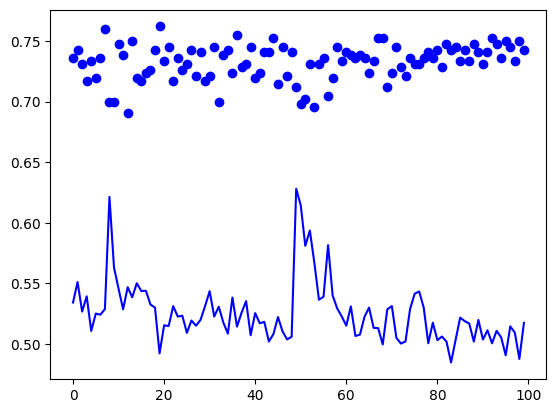

In [ ]:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, loss, 'b', label = 'Traning loss')
plt.show()

In [ ]:
#Save model
model.save('/content/drive/MyDrive/Colab Notebooks/FLOWERS/MODEL_FLOWERS.H6')

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/FLOWERS/MODEL_FLOWERS.H6')

1/1 [==============================] - 0s 20ms/step
hoa: apricot


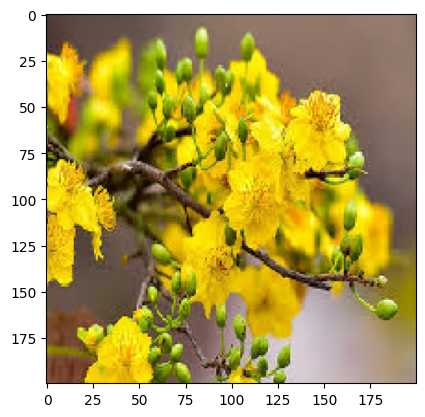

1/1 [==============================] - 0s 20ms/step
hoa: apricot


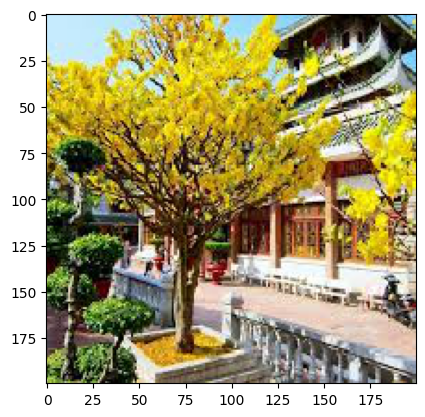

1/1 [==============================] - 0s 20ms/step
hoa: apricot


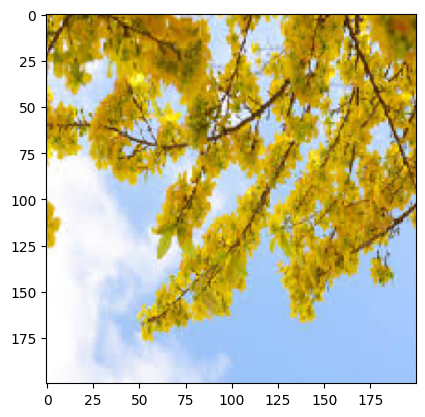

1/1 [==============================] - 0s 21ms/step
hoa: daisy


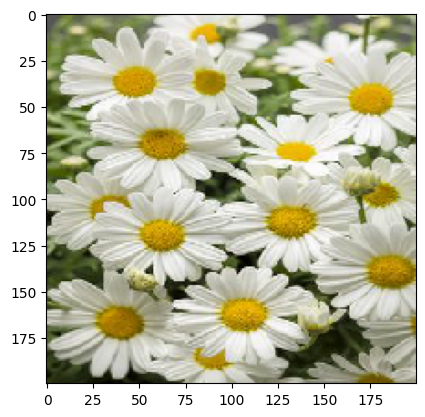

1/1 [==============================] - 0s 18ms/step
hoa: daisy


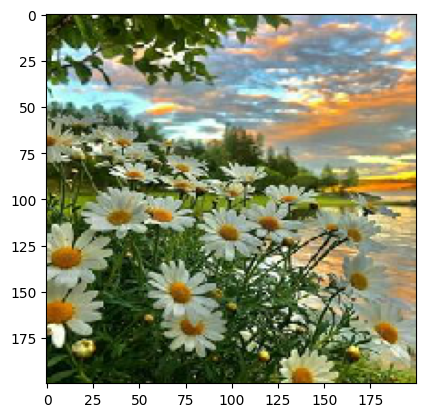

1/1 [==============================] - 0s 26ms/step
hoa: daisy


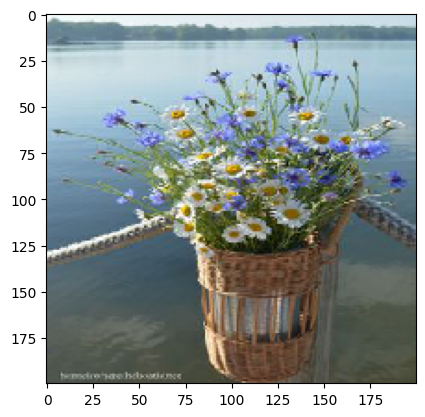

1/1 [==============================] - 0s 18ms/step
hoa: Rose


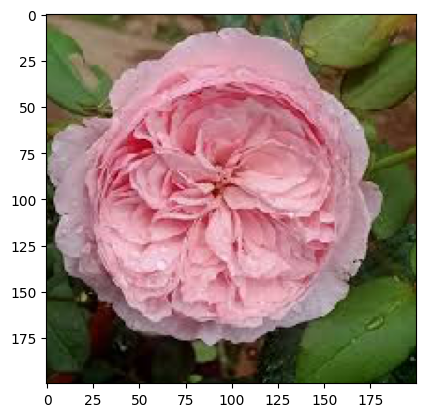

1/1 [==============================] - 0s 22ms/step
hoa: Rose


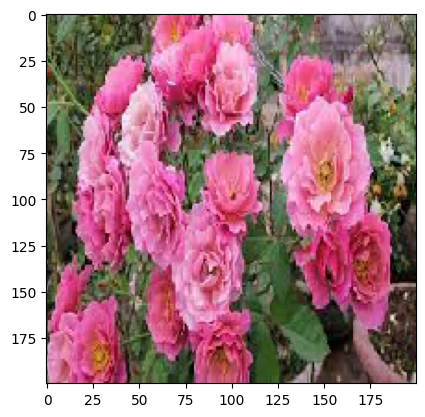

1/1 [==============================] - 0s 18ms/step
hoa: Rose


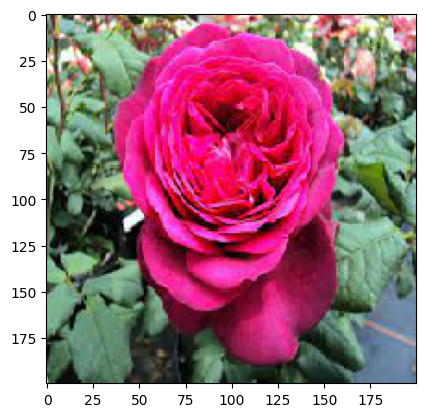

1/1 [==============================] - 0s 42ms/step
hoa: daisy


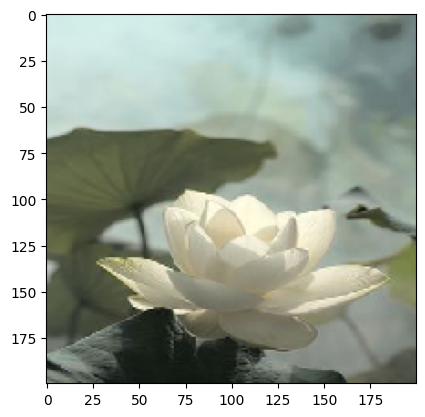

1/1 [==============================] - 0s 19ms/step
hoa: lotus


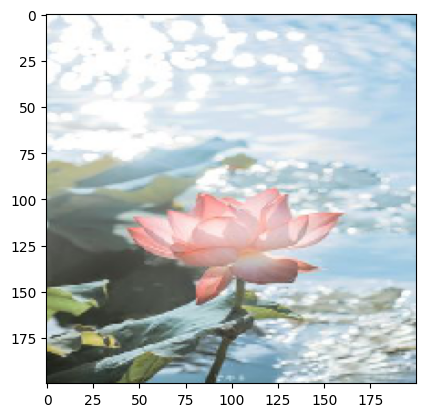

In [27]:
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
url = '/content/drive/MyDrive/Colab Notebooks/FLOWERSFORTEST'
j = 0
for i in listdir(url):
  if j < 60 :
    img = load_img(url + '/' + i, target_size = (200,200))
    imshow(img)
    img = img_to_array(img)
    img = img.reshape(1,200,200,3)
    img = img.astype('float32')
    img = img/255
    a = model.predict(img).argmax()
    class_name = [  'hoa: lotus', 'hoa: Rose','hoa: waterlily','hoa: daisy','hoa: apricot',]
    j =  j + 1
    print(class_name[a])
    plt.show()
  else :
    print ('KET THUC')
